<a href="https://colab.research.google.com/github/Varogell/PCVK_Ganjil_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Praktikum

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Mengubah tingkat kecerahan citra
 --------------------------------
Masukkan nilai kecerahan :50


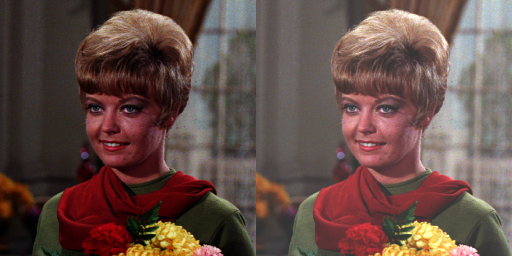

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
print(' Mengubah tingkat kecerahan citra')
print(' --------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan :'))
except ValueError:
  print('error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

##Tugas Praktikum

#Inverse Citra

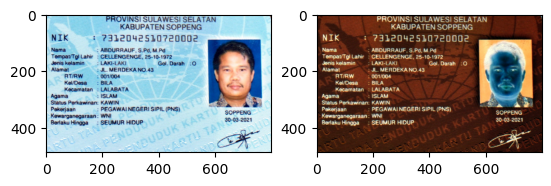

In [3]:

img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
img_asli = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_inverse = 255 - img_asli

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_asli)
ax[1].imshow(img_inverse)

#Contrast

 Mengubah tingkat kecerahan citra
 --------------------------------
Masukkan nilai kecerahan[-255-255] :150
Masukkan nilai kontras[1.0-3.0] :2


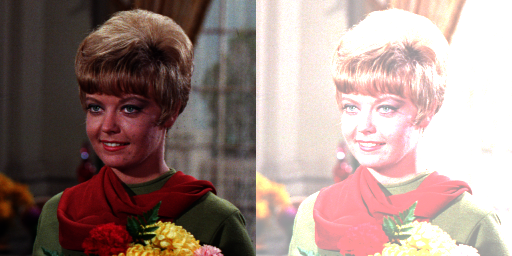

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
print(' Mengubah tingkat kecerahan citra')
print(' --------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan[-255-255] :'))
  contrast = float(input('Masukkan nilai kontras[1.0-3.0] :'))

except ValueError:
  print('error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)


#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast * original[y,x,c]+brightness,0,255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

#Logarithmic Brightness

 Mengubah tingkat kecerahan citra
 --------------------------------
Masukkan nilai kecerahan :50


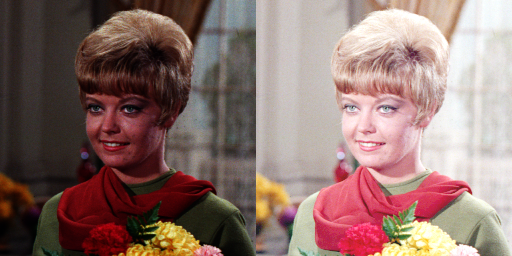

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
print(' Mengubah tingkat kecerahan citra')
print(' --------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan :'))
except ValueError:
  print('error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*(np.log(1 + original[y,x,c])), 0 , 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

#Grayscale Averaging

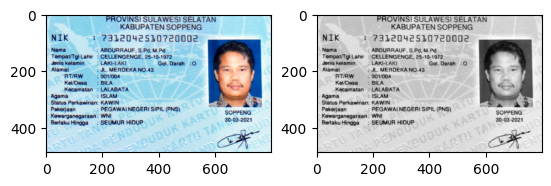

In [6]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
img_asli = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_avg = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
img_avg[:] = img_avg.mean(axis=-1, keepdims=True)
fig, ax = plt.subplots(1,2)

ax[0].imshow(img_asli)
ax[1].imshow(img_avg)


# Lightness

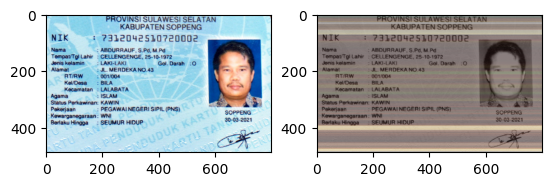

In [7]:

img_light = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
img_light[:] = np.max(img_light, axis=-1, keepdims=100)/2 + np.min(img_light, axis=-2, keepdims=100)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_asli)
ax[1].imshow(img_light)

# Luminance

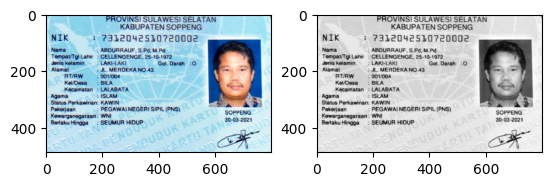

In [8]:
img_luminance = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
R, G, B = img_luminance[: , : , 0], img_luminance[: , : , 1], img_luminance[: , : , 2]
gray_img_luminance = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_asli)
ax[1].imshow(gray_img_luminance, cmap = 'gray')

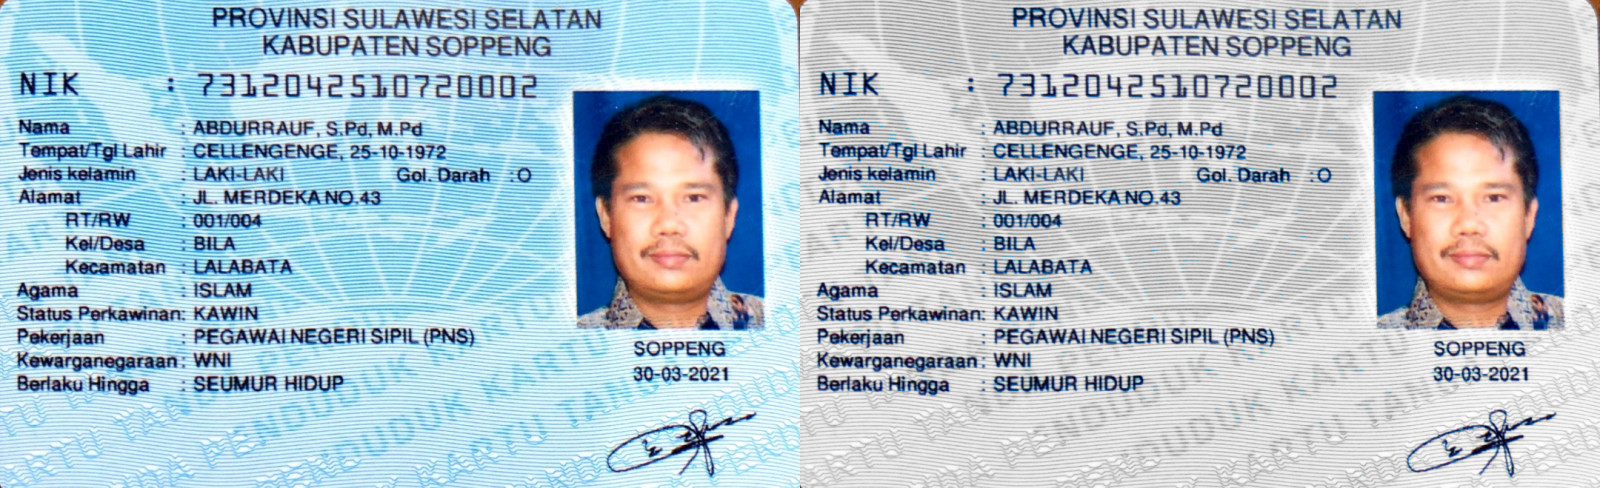

In [9]:
# Baca citra
original = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
color_gray_ktp = np.zeros(original.shape, original.dtype)
# Define the range of blue color (adjust these values as needed)
for x in range(original.shape[0]):
  for y in range(original.shape[1]):
    b = int(original[x, y, 0])
    g = int(original[x, y, 1])
    r = int(original[x, y, 2])

    average_grayscale = (r+g+b)/3
    if(r < 252 and g > 0 and b > 200):
      color_gray_ktp[x, y] = average_grayscale
    else:
      color_gray_ktp[x, y] = original[x, y]
final_original = cv.hconcat((original, color_gray_ktp))
cv2_imshow(final_original)